<a href="https://colab.research.google.com/github/matsunori39/Python_Practical_Data_Analysis_100_Knocks/blob/main/Python_Practical_Data_Analysis_100_Knocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 第1部 基礎編: データ加工

## 第1章 ウェブからの注文数を分析する10本ノック

### ノック1:データを読み込んでみよう

In [7]:
cd /content/drive/MyDrive/Colab Notebooks/workspace/HandsOn/Python_Practical_Data_Analysis_100_Knocks/サンプルコード_20201021/1章

/content/drive/MyDrive/Colab Notebooks/workspace/HandsOn/Python_Practical_Data_Analysis_100_Knocks/サンプルコード_20201021/1章


In [8]:
ls

1章_ウェブからの注文数を分析する１０本ノック_answer.ipynb
1章_ウェブからの注文数を分析する１０本ノック.ipynb
customer_master.csv
item_master.csv
transaction_1.csv
transaction_2.csv
transaction_detail_1.csv
transaction_detail_2.csv


In [9]:
import pandas as pd
customer_master = pd.read_csv('customer_master.csv')
customer_master.head()

,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref
0,IK152942,平田 裕次郎,2019-01-01 00:25:33,ひらた ゆうじろう,hirata_yuujirou@example.com,M,29,1990/6/10,石川県
1,TS808488,田村 詩織,2019-01-01 01:13:45,たむら しおり,tamura_shiori@example.com,F,33,1986/5/20,東京都
2,AS834628,久野 由樹,2019-01-01 02:00:14,ひさの ゆき,hisano_yuki@example.com,F,63,1956/1/2,茨城県
3,AS345469,鶴岡 薫,2019-01-01 04:48:22,つるおか かおる,tsuruoka_kaoru@example.com,M,74,1945/3/25,東京都
4,GD892565,大内 高史,2019-01-01 04:54:51,おおうち たかし,oouchi_takashi@example.com,M,54,1965/8/5,千葉県


In [10]:
item_master = pd.read_csv('item_master.csv')
item_master.head()

,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


In [11]:
transaction_1 = pd.read_csv('transaction_1.csv')
transaction_1.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [12]:
transaction_detail_1 = pd.read_csv('transaction_detail_1.csv')
transaction_detail_1.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


### ノック2: データを結合(ユニオン)してみよう

In [13]:
transaction_2 = pd.read_csv('transaction_2.csv')
transaction = pd.concat([transaction_1, transaction_2], ignore_index=True)
transaction.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [14]:
print(len(transaction_1))
print(len(transaction_2))
print(len(transaction))

5000
1786
6786


In [15]:
transaction_detail_2 = pd.read_csv('transaction_detail_2.csv')
transaction_detail = pd.concat([transaction_detail_1, transaction_detail_2], ignore_index=True)
transaction_detail.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


### ノック3: 売上データ同士を結合(ジョイン)してみよう

In [16]:
join_data = pd.merge(transaction_detail, transaction[["transaction_id", "payment_date", "customer_id"]], on="transaction_id", how="left")
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865


In [17]:
print(len(transaction_detail))
print(len(transaction))
print(len(join_data))

7144
6786
7144


### ノック4: マスターデータを結合(ジョイン)してみよう

In [18]:
join_data = pd.merge(join_data, customer_master, on="customer_id", how="left")
join_data = pd.merge(join_data, item_master, on="item_id", how="left")
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref,item_name,item_price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,井本 芳正,2019-01-07 14:34:35,いもと よしまさ,imoto_yoshimasa@example.com,M,30,1989/7/15,熊本県,PC-E,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,三船 六郎,2019-01-27 18:00:11,みふね ろくろう,mifune_rokurou@example.com,M,73,1945/11/29,京都府,PC-A,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,山根 小雁,2019-01-11 08:16:02,やまね こがん,yamane_kogan@example.com,M,42,1977/5/17,茨城県,PC-C,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,池田 菜摘,2019-01-10 05:07:38,いけだ なつみ,ikeda_natsumi@example.com,F,47,1972/3/17,兵庫県,PC-E,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,栗田 憲一,2019-01-25 06:46:05,くりた けんいち,kurita_kenichi@example.com,M,74,1944/12/17,長崎県,PC-B,85000


### ノック5: 必要なデータ列を作ろう

In [19]:
join_data["price"] = join_data.quantity * join_data.item_price
join_data[["quantity", "item_price", "price"]].head()

,quantity,item_price,price
0,1,210000,210000
1,1,50000,50000
2,1,120000,120000
3,1,210000,210000
4,2,85000,170000


### ノック6: データ検算をしよう

In [20]:
print(join_data.price.sum())
print(transaction.price.sum())

971135000
971135000


In [21]:
join_data.price.sum() == transaction.price.sum()

True

### ノック7: 各種統計量を把握しよう

In [22]:
join_data.isnull().sum()

detail_id             0
transaction_id        0
item_id               0
quantity              0
payment_date          0
customer_id           0
customer_name         0
registration_date     0
customer_name_kana    0
email                 0
gender                0
age                   0
birth                 0
pref                  0
item_name             0
item_price            0
price                 0
dtype: int64

In [23]:
join_data.describe()

,detail_id,quantity,age,item_price,price
count,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000
mean,3571.500000,1.199888,50.265677,121698.628219,135937.150056
std,2062.439494,0.513647,17.190314,64571.311830,68511.453297
min,0.000000,1.000000,20.000000,50000.000000,50000.000000
25%,1785.750000,1.000000,36.000000,50000.000000,85000.000000
50%,3571.500000,1.000000,50.000000,102500.000000,120000.000000
75%,5357.250000,1.000000,65.000000,187500.000000,210000.000000
max,7143.000000,4.000000,80.000000,210000.000000,420000.000000


In [24]:
print(join_data.payment_date.min())
print(join_data.payment_date.max())

2019-02-01 01:36:57
2019-07-31 23:41:38


### ノック8: 月別でデータを集計してみよう

In [25]:
join_data.dtypes

detail_id              int64
transaction_id        object
item_id               object
quantity               int64
payment_date          object
customer_id           object
customer_name         object
registration_date     object
customer_name_kana    object
email                 object
gender                object
age                    int64
birth                 object
pref                  object
item_name             object
item_price             int64
price                  int64
dtype: object

In [26]:
join_data.payment_date = pd.to_datetime(join_data.payment_date)
join_data["payment_month"] = join_data.payment_date.dt.strftime("%Y%m")
join_data[["payment_date", "payment_month"]].head()

,payment_date,payment_month
0,2019-02-01 01:36:57,201902
1,2019-02-01 01:37:23,201902
2,2019-02-01 02:34:19,201902
3,2019-02-01 02:47:23,201902
4,2019-02-01 04:33:46,201902


In [27]:
join_data.groupby("payment_month").sum()["price"]

payment_month
201902    160185000
201903    160370000
201904    160510000
201905    155420000
201906    164030000
201907    170620000
Name: price, dtype: int64

### ノック9: 月別、商品別でデータを集計してみよう

In [28]:
join_data.groupby(["payment_month", "item_name"]).sum()[["price", "quantity"]]

price  quantity
payment_month item_name                    
201902        PC-A       24150000       483
              PC-B       25245000       297
              PC-C       19800000       165
              PC-D       31140000       173
              PC-E       59850000       285
201903        PC-A       26000000       520
              PC-B       25500000       300
              PC-C       19080000       159
              PC-D       25740000       143
              PC-E       64050000       305
201904        PC-A       25900000       518
              PC-B       23460000       276
              PC-C       21960000       183
              PC-D       24300000       135
              PC-E       64890000       309
201905        PC-A       24850000       497
              PC-B       25330000       298
              PC-C       20520000       171
              PC-D       25920000       144
              PC-E       58800000       280
201906        PC-A       26000000       520
              PC-B       23970000       282
              PC-C       21840000       182
              PC-D       28800000       160
              PC-E       63420000       302
201907        PC-A       25250000       505
              PC-B       28220000       332
              PC-C       19440000       162
              PC-D       26100000       145
              PC-E       71610000       341

In [29]:
pd.pivot_table(join_data, index='item_name', columns='payment_month', values=['price', 'quantity'], aggfunc='sum')

price                      ... quantity              
payment_month    201902    201903    201904  ...   201905 201906 201907
item_name                                    ...                       
PC-A           24150000  26000000  25900000  ...      497    520    505
PC-B           25245000  25500000  23460000  ...      298    282    332
PC-C           19800000  19080000  21960000  ...      171    182    162
PC-D           31140000  25740000  24300000  ...      144    160    145
PC-E           59850000  64050000  64890000  ...      280    302    341

[5 rows x 12 columns]

### ノック10: 商品別の売上推移を可視化してみよう

In [30]:
graph_data = pd.pivot_table(join_data, index='payment_month', columns='item_name', values='price', aggfunc='sum')
graph_data.head()

item_name,PC-A,PC-B,PC-C,PC-D,PC-E
payment_month,,,,,
201902,24150000,25245000,19800000,31140000,59850000
201903,26000000,25500000,19080000,25740000,64050000
201904,25900000,23460000,21960000,24300000,64890000
201905,24850000,25330000,20520000,25920000,58800000
201906,26000000,23970000,21840000,28800000,63420000


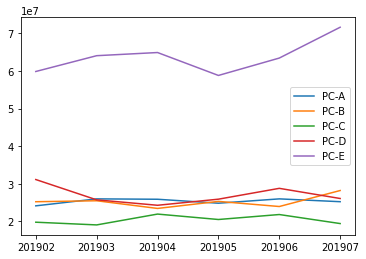

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(list(graph_data.index), graph_data["PC-A"], label='PC-A')
plt.plot(list(graph_data.index), graph_data["PC-B"], label='PC-B')
plt.plot(list(graph_data.index), graph_data["PC-C"], label='PC-C')
plt.plot(list(graph_data.index), graph_data["PC-D"], label='PC-D')
plt.plot(list(graph_data.index), graph_data["PC-E"], label='PC-E')
plt.legend()

## 第2章 小売店のデータでデータ加工を行う10本ノック

In [32]:
pwd

'/content/drive/MyDrive/Colab Notebooks/workspace/HandsOn/Python_Practical_Data_Analysis_100_Knocks/サンプルコード_20201021/1章'

In [33]:
cd ../2章

/content/drive/MyDrive/Colab Notebooks/workspace/HandsOn/Python_Practical_Data_Analysis_100_Knocks/サンプルコード_20201021/2章


### ノック11: データを読み込んでみよう

In [34]:
import pandas as pd
uriage_data = pd.read_csv("uriage.csv")
uriage_data.head()

,purchase_date,item_name,item_price,customer_name
0,2019-06-13 18:02:34,商品A,100.0,深井菜々美
1,2019-07-13 13:05:29,商 品 S,NaN,浅田賢二
2,2019-05-11 19:42:07,商 品 a,NaN,南部慶二
3,2019-02-12 23:40:45,商品Z,2600.0,麻生莉緒
4,2019-04-22 03:09:35,商品a,NaN,平田鉄二


In [35]:
kokyaku_data = pd.read_excel("kokyaku_daicho.xlsx")
kokyaku_data.head()

ImportError: ignored

### ノック12: データの揺れを見てみよう

In [ ]:
uriage_data.item_name.head()

In [ ]:
uriage_data.item_price.head()

### ノック13: データに揺れがあるまま集計してみよう

In [ ]:
uriage_data.purchase_date = pd.to_datetime(uriage_data.purchase_date)
uriage_data["purchase_month"] = uriage_data.purchase_date.dt.strftime("%Y%m")
res = uriage_data.pivot_table(index="purchase_month", columns="item_name", aggfunc="size", fill_value=0)
res

In [ ]:
res = uriage_data.pivot_table(index="purchase_month", columns="item_name", values="item_price", aggfunc="sum", fill_value=0)
res

### ノック14: 商品名の揺れを補正しよう

In [ ]:
print(len(pd.unique(uriage_data.item_name)))

In [ ]:
uriage_data.item_name = uriage_data.item_name.str.upper()
uriage_data.item_name = uriage_data.item_name.str.replace("　", "")
uriage_data.item_name = uriage_data.item_name.str.replace(" ", "")
uriage_data.sort_values(by=["item_name"], ascending=True)

In [ ]:
print(pd.unique(uriage_data.item_name))
print(len(pd.unique(uriage_data.item_name)))

### ノック15: 金額欠損値の補完をしよう

In [ ]:
uriage_data.isnull().any(axis=0)

In [ ]:
flg_is_null = uriage_data.item_price.isnull()
for trg in list(uriage_data.loc[flg_is_null, "item_name"].unique()):
  price = uriage_data.loc[(~flg_is_null) & (uriage_data.item_name == trg), "item_price"].max()
  uriage_data.item_price.loc[(flg_is_null) & (uriage_data.item_name==trg)] = price
uriage_data.head()

In [ ]:
uriage_data.isnull().any(axis=0)

In [ ]:
for trg in list(uriage_data.item_name.sort_values().unique()):
  print(trg + "の最大額:" + str(uriage_data.loc[uriage_data.item_name==trg].item_price.max()) + "の最小額:" + str(uriage_data.loc[uriage_data.item_name==trg].item_price.min(skipna=False)))

### ノック16: 顧客名の揺れを補正しよう

In [ ]:
kokyaku_data.顧客名.head()

In [ ]:
uriage_data.customer_name.head()

In [ ]:
kokyaku_data.顧客名 = kokyaku_data.顧客名.str.replace("　", "")
kokyaku_data.顧客名 = kokyaku_data.顧客名.str.replace(" ", "")
kokyaku_data.顧客名.head()

### ノック17: 日付の揺れを補正しよう

In [ ]:
flg_is_serial = kokyaku_data.登録日.astype("str").str.isdigit()
flg_is_serial.sum()

In [ ]:
fromSerial = pd.to_timedelta(kokyaku_data.loc[flg_is_serial, "登録日"].astype("float"), unit="D") + pd.to_datetime("1900/01/01")
fromSerial

In [ ]:
fromString = pd.to_datetime(kokyaku_data.loc[~flg_is_serial, "登録日"])
fromString

In [ ]:
kokyaku_data.登録日 = pd.concat([fromSerial, fromString])
kokyaku_data

In [ ]:
kokyaku_data["登録年月"] = kokyaku_data.登録日.dt.strftime("%Y%m")
rslt = kokyaku_data.groupby("登録年月").count().顧客名
print(rslt)
print(len(kokyaku_data))

In [ ]:
flg_is_serial = kokyaku_data.登録日.astype("str").str.isdigit()
flg_is_serial.sum()

### ノック18: 顧客名をキーに2つのデータを結合(ジョイン)しよう

In [ ]:
join_data = pd.merge(uriage_data, kokyaku_data, left_on="customer_name", right_on="顧客名", how="left")
join_data = join_data.drop("customer_name", axis=1)
join_data

### ノック19：クレンジングしたデータをダンプしよう

In [ ]:
dump_data = join_data[["purchase_date", "purchase_month", "item_name", "item_price", "顧客名", "かな", "地域", "メールアドレス", "登録日"]]
dump_data

In [ ]:
dump_data.to_csv("dump_data.csv", index=False)

### ノック20: データを集計しよう

In [ ]:
import_data = pd.read_csv("dump_data.csv")
import_data

In [ ]:
byItem = import_data.pivot_table(index="purchase_month",columns="item_name", aggfunc="size", fill_value=0)
byItem

In [ ]:
byPrice = import_data.pivot_table(index="purchase_month",columns="item_name", values="item_price", aggfunc="sum", fill_value=0)
byPrice

In [ ]:
byCustomer = import_data.pivot_table(index="purchase_month",columns="顧客名", aggfunc="size", fill_value=0)
byCustomer

In [ ]:
byRegion = import_data.pivot_table(index="purchase_month", columns="地域", aggfunc="size", fill_value=0)
byRegion

In [ ]:
away_data = pd.merge(uriage_data, kokyaku_data, left_on="customer_name", right_on="顧客名", how="right")
away_data[away_data.purchase_date.isnull()][["顧客名", "メールアドレス", "登録日"]]

# 第2部 実践編1: 機械学習

## 第3章 顧客の全体像を把握する10本ノック

In [36]:
!pwd

/content/drive/MyDrive/Colab Notebooks/workspace/HandsOn/Python_Practical_Data_Analysis_100_Knocks/サンプルコード_20201021/2章


In [37]:
cd ../3章

/content/drive/MyDrive/Colab Notebooks/workspace/HandsOn/Python_Practical_Data_Analysis_100_Knocks/サンプルコード_20201021/3章


### ノック21: データを読み込んで把握しよう

In [38]:
import pandas as pd
uselog = pd.read_csv('use_log.csv')
print(len(uselog))
uselog.head()

197428


,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


In [39]:
customer = pd.read_csv('customer_master.csv')
print(len(customer))
customer.head()

4192


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0


In [40]:
class_master = pd.read_csv('class_master.csv')
print(len(class_master))
class_master.head()

3


,class,class_name,price
0,C01,オールタイム,10500
1,C02,デイタイム,7500
2,C03,ナイト,6000


In [41]:
campaign_master = pd.read_csv('campaign_master.csv')
print(len(campaign_master))
campaign_master.head()

3


,campaign_id,campaign_name
0,CA1,通常
1,CA2,入会費半額
2,CA3,入会費無料


### ノック22: 顧客データを整形しよう

In [42]:
customer_join = pd.merge(customer, class_master, on="class", how="left")
customer_join = pd.merge(customer_join, campaign_master, on="campaign_id", how="left")
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,ナイト,6000,通常


In [43]:
customer_join.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
dtype: int64

### ノック23: 顧客データの基礎集計をしよう

In [44]:
customer_join.groupby("class_name").count().customer_id

class_name
オールタイム    2045
デイタイム     1019
ナイト       1128
Name: customer_id, dtype: int64

In [45]:
customer_join.groupby("campaign_name").count().customer_id

campaign_name
入会費半額     650
入会費無料     492
通常       3050
Name: customer_id, dtype: int64

In [46]:
customer_join.groupby("gender").count().customer_id

gender
F    1983
M    2209
Name: customer_id, dtype: int64

In [47]:
customer_join.groupby("is_deleted").count().customer_id

is_deleted
0    2842
1    1350
Name: customer_id, dtype: int64

In [48]:
customer_join.start_date = pd.to_datetime(customer_join.start_date)
customer_start = customer_join.loc[customer_join.start_date > pd.to_datetime("20180401")]
print(len(customer_start))

1361


### ノック24: 最新顧客データの基礎集計をしてみよう

In [49]:
customer_join.end_date = pd.to_datetime(customer_join.end_date)
customer_newer = customer_join.loc[(customer_join.end_date >= pd.to_datetime("20190331")) | (customer_join.end_date.isna())]
print(len(customer_newer))
customer_newer.end_date.unique()

2953


array([                          'NaT', '2019-03-31T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [50]:
customer_newer.groupby("class_name").count().customer_id

class_name
オールタイム    1444
デイタイム      696
ナイト        813
Name: customer_id, dtype: int64

In [51]:
customer_newer.groupby("campaign_name").count().customer_id

campaign_name
入会費半額     311
入会費無料     242
通常       2400
Name: customer_id, dtype: int64

In [52]:
customer_newer.groupby("gender").count().customer_id

gender
F    1400
M    1553
Name: customer_id, dtype: int64

### ノック25: 利用履歴データを集計しよう

In [53]:
uselog.usedate = pd.to_datetime(uselog.usedate)
uselog["年月"] = uselog.usedate.dt.strftime("%Y%m")
uselog_months = uselog.groupby(["年月", "customer_id"], as_index=False).count()
uselog_months.rename(columns={"log_id":"count"}, inplace=True)
del uselog_months["usedate"]
uselog_months.head()

,年月,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7


In [54]:
uselog_customer = uselog_months.groupby("customer_id").agg(["mean", "median", "max", "min"])["count"]
uselog_customer = uselog_customer.reset_index(drop=False)
uselog_customer.head()

,customer_id,mean,median,max,min
0,AS002855,4.500000,5.0,7,2
1,AS008805,4.000000,4.0,8,1
2,AS009013,2.000000,2.0,2,2
3,AS009373,5.083333,5.0,7,3
4,AS015233,7.545455,7.0,11,4


### ノック26: 利用履歴データから定期利用フラグを作成しよう

In [56]:
uselog["weekday"] = uselog.usedate.dt.weekday
uselog_weekday = uselog.groupby(["customer_id", "年月", "weekday"], as_index=False).count()[["customer_id", "年月", "log_id"]]
uselog_weekday.rename(columns={"log_id": "count"}, inplace=True)
uselog_weekday.head()

,customer_id,年月,count
0,AS002855,201804,4
1,AS002855,201805,1
2,AS002855,201805,4
3,AS002855,201806,5
4,AS002855,201807,1


In [59]:
uselog_weekday = uselog_weekday.groupby("customer_id", as_index=False).mean()[["customer_id", "count"]]
uselog_weekday["routine_flg"] = 0
uselog_weekday.routine_flg = uselog_weekday.routine_flg.where(uselog_weekday["count"]<4, 1)
uselog_weekday.head()

,customer_id,count,routine_flg
0,AS002855,2.000000,0
1,AS008805,1.739130,0
2,AS009013,2.000000,0
3,AS009373,2.652174,0
4,AS015233,1.930233,0


### ノック27: 顧客データと利用履歴データを結合しよう

In [60]:
customer_join = pd.merge(customer_join, uselog_customer, on="customer_id", how="left")
customer_join = pd.merge(customer_join, uselog_weekday[["customer_id", "routine_flg"]], on="customer_id", how="left")
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,5.0,8,2,0
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,5.083333,5.0,7,3,0
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.583333,5.0,6,3,0
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,4.5,7,2,0
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,ナイト,6000,通常,3.916667,4.0,6,1,0


In [61]:
customer_join.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
mean                0
median              0
max                 0
min                 0
routine_flg         0
dtype: int64